In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')
%matplotlib inline


## Analisis conversion

In [2]:
tipos_conv = {"mes": np.int8,
             "anio": np.int16,
             "USER_ID": np.int64}

In [3]:
conversiones = pd.read_pickle('../data/conversiones.pkl')

In [42]:
conversiones.head()

NameError: name 'conversiones' is not defined

In [5]:
conversiones.shape

(1738, 4)

#### 1738 conversiones 

### ¿Hay valores nulos? 

In [6]:
conversiones.isnull().sum()

mes          0
anio         0
USER_ID      0
trimestre    0
dtype: int64

### ¿Es de un mismo año?

In [7]:
conversiones["anio"].nunique()

1

#### Todas del 2018

### ¿Cual es el top 5 de usuarios con más conversión?

In [8]:
conversiones.groupby("USER_ID").agg({"mes": "count"}).nlargest(columns = "mes", n = 10)

,mes
USER_ID,
7088,24
8934,13
8270,12
8333,10
681,8
1493,8
4116,7
10756,7
437,6


#### El máximo numero de conversiones por usuario en todo el año es 24


### Top de ususario con mas conversiones en un trimestre

In [12]:
conversiones.groupby(["USER_ID","trimestre"]).agg({"mes":"count"}).nlargest(columns = "mes", n = 10)\
            .rename(columns = {"mes":"cant_conv_trimestre"})

,,cant_conv_trimestre
USER_ID,trimestre,
7088,3,12
8333,4,10
8934,3,7
7522,2,6
437,4,5
801,2,5
1493,4,5
2235,3,5
4116,4,5


### Top de usuarios con mas conversiones por mes

In [14]:
conversiones.groupby(["USER_ID","mes"]).agg({"trimestre":"count"}).nlargest(columns = "trimestre", n = 10)\
            .rename(columns = {"trimestre":"cant_conv_mes"})

,,cant_conv_mes
USER_ID,mes,
7088,8,8
7522,6,6
8333,11,5
801,6,4
1941,6,4
2986,6,4
7088,9,4
340,6,3
437,10,3


### Conversiones a traves de los meses

In [18]:
conv_mes = conversiones['mes'].value_counts().sort_index(ascending=True)

Text(0.5, 0.98, 'Conversiones a traves de los meses')

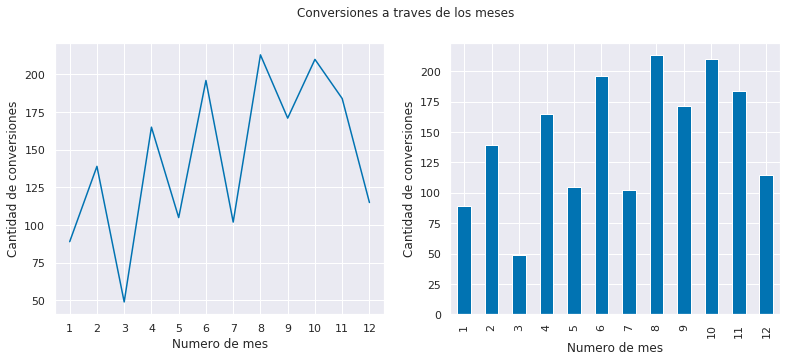

In [48]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
#Plot lineas
ax1.plot(conv_mes)
ax1.set_xticks(conv_mes.index)
ax1.set_ylabel("Cantidad de conversiones")
ax1.set_xlabel("Numero de mes")

#Plot barras
conv_mes.plot(kind='bar', ax = ax2)
plt.ylabel("Cantidad de conversiones")
plt.xlabel("Numero de mes")

plt.suptitle("Conversiones a traves de los meses")


#### Se observa una distribucion muy irregular en las conversiones a traves de los meses
##### __Minimo__: Marzo - 1er Trimestre
##### __Maximo__: Agosto - 3er Trimestre

#### Un patron que se ve es que el número de conversiones tiende a realizar un descenso luego de cada mes donde se supero al anterior, además en el ultimo trimestre se tiene un descenso de dos meses seguidos

### Conversiones a traves de los meses tomando como posible una unica conversion por usuario en un mes

In [15]:
conv_mes = conversiones.groupby("mes").agg({"USER_ID":"nunique"})

Text(0.5, 0.98, 'Conversiones a traves de los meses')

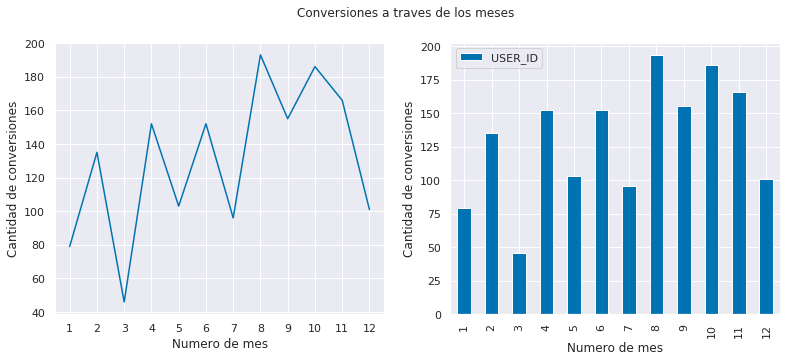

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
#Plot lineas
ax1.plot(conv_mes)
ax1.set_xticks(conv_mes.index)
ax1.set_ylabel("Cantidad de conversiones")
ax1.set_xlabel("Numero de mes")

#Plot barras
conv_mes.plot(kind='bar', ax = ax2)
plt.ylabel("Cantidad de conversiones")
plt.xlabel("Numero de mes")

plt.suptitle("Conversiones a traves de los meses")


#### Se ve la misma distribucion

### Conversiones a traves de los trimestres

In [26]:
conv_trim = conversiones['trimestre'].value_counts().sort_index(ascending=True)

Text(0.5, 0.98, 'Conversiones a traves de los trimestres')

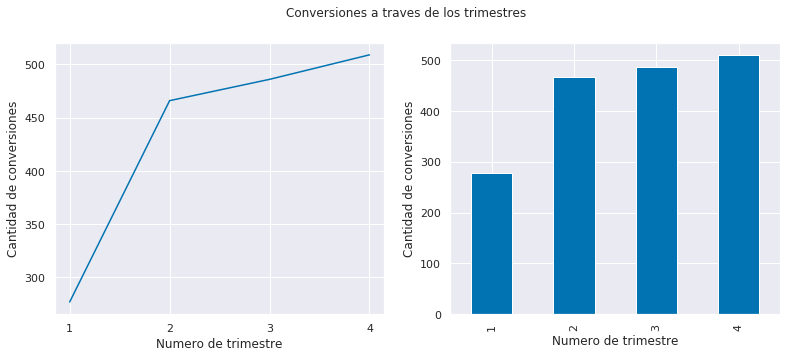

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
#Plot lineas
ax1.plot(conv_trim)
ax1.set_xticks(conv_trim.index)
ax1.set_ylabel("Cantidad de conversiones")
ax1.set_xlabel("Numero de trimestre")

#Plot barras
conv_trim.plot(kind='bar', ax = ax2)
plt.ylabel("Cantidad de conversiones")
plt.xlabel("Numero de trimestre")

plt.suptitle("Conversiones a traves de los trimestres")


#### A pesar que la distribucion a traves de los meses es irregular, con respecto a los trimestres se ve una clara alza

---

## Device data

In [18]:
device_data = pd.read_pickle("../data/device_data.pkl")

In [20]:
device_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871406 entries, 0 to 2871405
Data columns (total 6 columns):
FEC_EVENT           datetime64[ns]
CONNECTION_SPEED    int8
IS_MOBILE_DEVICE    bool
USER_ID             int64
mes                 int64
trimestre           int64
dtypes: bool(1), datetime64[ns](1), int64(3), int8(1)
memory usage: 93.1 MB


In [21]:
device_data.head()

,FEC_EVENT,CONNECTION_SPEED,IS_MOBILE_DEVICE,USER_ID,mes,trimestre
0,2018-01-12 00:00:06,1,False,6574,1,1
1,2018-01-12 00:00:06,3,True,2639,1,1
2,2018-01-12 00:00:08,0,False,3898,1,1
3,2018-01-12 00:00:09,1,False,7996,1,1
4,2018-01-12 00:00:14,1,False,6111,1,1


### ¿Hay valores nulos? 

In [22]:
device_data.isnull().sum()

FEC_EVENT           0
CONNECTION_SPEED    0
IS_MOBILE_DEVICE    0
USER_ID             0
mes                 0
trimestre           0
dtype: int64

### ¿Cual es el top 5 de usuarios con más eventos?

In [24]:
device_data.groupby("USER_ID").agg({"FEC_EVENT": "count"}).nlargest(columns = "FEC_EVENT", n = 10)

,FEC_EVENT
USER_ID,
7829,2754
9119,2638
8758,2370
10735,2128
10666,2051
5170,2027
7883,2016
7873,1947
9452,1893


### Top de usuarios con mas eventos en un trimestre

In [25]:
device_data.groupby(["USER_ID","trimestre"]).agg({"FEC_EVENT":"count"}).nlargest(columns = "FEC_EVENT", n = 10)\
            .rename(columns = {"FEC_EVENT":"cant_conv_trimestre"})

cant_conv_trimestre
USER_ID trimestre                     
7829    3                          838
9119    3                          824
7883    2                          784
9119    2                          750
11341   4                          735
5170    4                          691
7829    4                          682
        1                          678
2743    2                          660
8758    4                          660

### Top de usuarios con mas eventos por mes

In [28]:
device_data.groupby(["USER_ID","mes"]).agg({"mes":"count"}).nlargest(columns = "mes", n = 10)\
            .rename(columns = {"mes":"cant_conv_mes"})

cant_conv_mes
USER_ID mes               
7883    5              374
7829    10             360
        8              357
4753    12             350
11341   11             337
9119    8              334
7829    9              317
2743    5              299
9119    5              298
6157    10             284

### Eventos a traves de los meses

In [29]:
eventos_mes = device_data['mes'].value_counts().sort_index(ascending=True)

Text(0.5, 0.98, 'Eventos a traves de los meses')

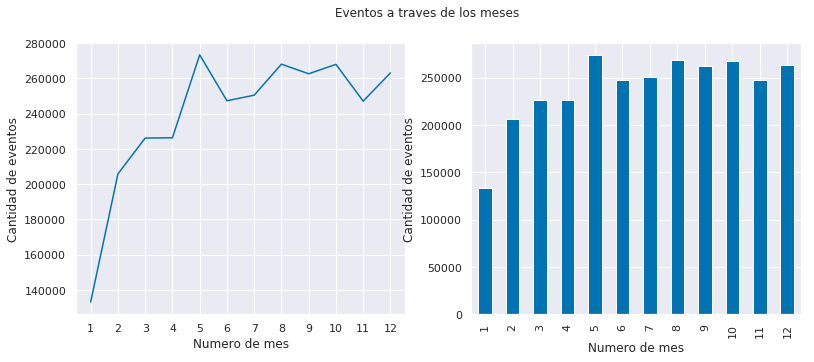

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (13,5))
#Plot lineas
ax1.plot(eventos_mes)
ax1.set_xticks(eventos_mes.index)
ax1.set_ylabel("Cantidad de eventos")
ax1.set_xlabel("Numero de mes")

#Plot barras
eventos_mes.plot(kind='bar', ax = ax2)
plt.ylabel("Cantidad de eventos")
plt.xlabel("Numero de mes")

plt.suptitle("Eventos a traves de los meses")


### Niveles de conexion

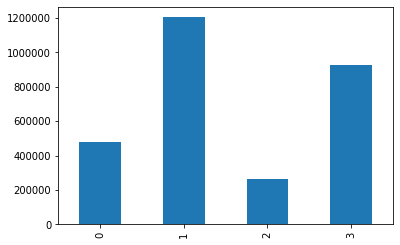

In [49]:
device_data['CONNECTION_SPEED'].value_counts().sort_index(ascending=True).plot(kind='bar')

### Cantidad de dispositivos moviles vs no moviles

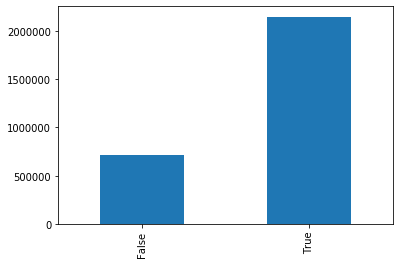

In [50]:
device_data['IS_MOBILE_DEVICE'].value_counts().sort_index(ascending=True).plot(kind='bar')

In [51]:
device_data['USER_ID'].value_counts().shape

(11676,)

In [52]:
#Todas las fechas son de 2018
device_data['FEC_EVENT'].dt.year.value_counts()

2018    2871406
Name: FEC_EVENT, dtype: int64

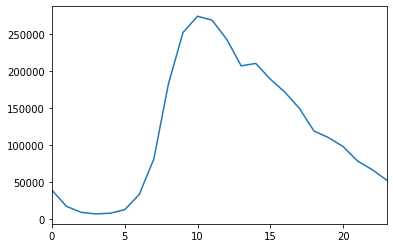

In [55]:
device_data['FEC_EVENT'].dt.hour.value_counts().sort_index(ascending=True).plot(kind='line')

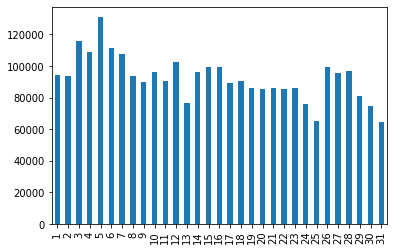

In [54]:
device_data['FEC_EVENT'].dt.day.value_counts().sort_index(ascending=True).plot(kind='bar')

---

## Pageviews

In [2]:
pageviews = pd.read_pickle("../data/pageviews_total_formateado.pkl")

In [3]:
pageviews.head()

,CONTENT_CATEGORY,CONTENT_CATEGORY_BOTTOM,CONTENT_CATEGORY_TOP,FEC_EVENT,ON_SITE_SEARCH_TERM,PAGE,SITE_ID,USER_ID,mes,trimestre
0,2,2,2,2018-01-01 00:09:17,1,2,2,7237,1,1
1,2,2,2,2018-01-01 00:14:17,1,2,2,4913,1,1
2,2,2,2,2018-01-01 00:14:18,1,2,2,4913,1,1
3,2,2,2,2018-01-01 00:14:26,1,3,3,4913,1,1
4,2,2,2,2018-01-01 00:14:32,1,20,3,4913,1,1


In [4]:
#Hay 1725 paginas distintas, #1733 en el completo
pageviews['PAGE'].value_counts().shape

(1733,)

In [5]:
#Datos de 11676 usuarios (igual que en device_data)
pageviews['USER_ID'].value_counts().shape

(11676,)

In [41]:
#supongo que ON_SITE_SEARCH_TERM dice cuantas veces el usuario busco algo en la pagina una vez que entró
pageviews['ON_SITE_SEARCH_TERM'].value_counts().head()

1     22869822
49          25
32          11
36          10
89          10
Name: ON_SITE_SEARCH_TERM, dtype: int64

In [49]:
pageviews['PAGE'].value_counts().head()

2     3776445
3     3663187
21     944796
27     859865
5      842710
Name: PAGE, dtype: int64

Text(0.5, 0, 'SITE_ID')

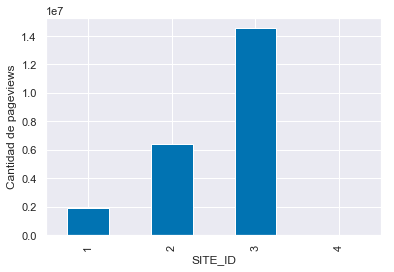

In [29]:
#Plot SITE_ID
pl=pageviews['SITE_ID'].value_counts().sort_index().plot(kind='bar')
pl.set_ylabel("Cantidad de pageviews")
pl.set_xlabel("SITE_ID")



In [52]:
pageviews['CONTENT_CATEGORY'].value_counts().head()

2    19248638
4     1653726
1     1404544
6      262689
5       31943
Name: CONTENT_CATEGORY, dtype: int64